<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [90]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [24]:
# Answer:
rows = movies.shape[0]
print("rows:", rows)

columns = movies.shape[1]
print("columns:", columns)

rows: 979
columns: 6


#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [453]:
# Answer:
avg_duration = movies.loc[:,'duration'].mean()
print("average duration:", avg_duration, "min")

average duration: 120.97957099080695 min


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [454]:
# Answer:
min_duration = min(movies.loc[:,'duration'].sort_values())
print("min duration:", min_duration,"min")

max_duration = max(movies.loc[:,'duration'].sort_values())
print("max duration:", max_duration,"min")

min duration: 64 min
max duration: 242 min


#### Create a histogram of duration, choosing an "appropriate" number of bins.

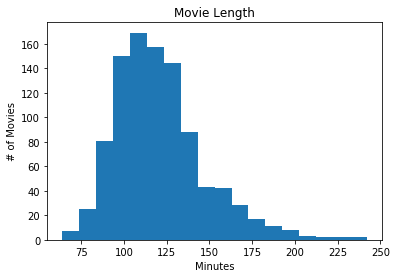

In [47]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='hist',bins=18) 
# ~ 10 minute intervals
ax.set_title("Movie Length");
ax.set_xlabel("Minutes");
ax.set_ylabel("# of Movies");

#### Use a box plot to display that same data.

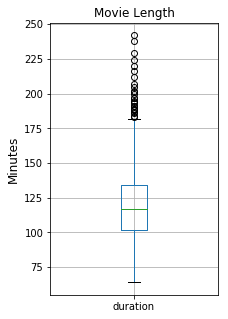

In [455]:
# Answer:
ax = movies.boxplot(column='duration',figsize=(3,5))
ax.set_title("Movie Length");
ax.set_ylabel("Minutes",fontsize=12);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [63]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'# of Movies w Rating')

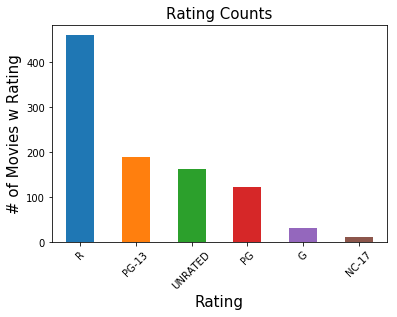

In [504]:
# Answer:
sorted_rating_counts = movies.loc[:,'content_rating'].value_counts().sort_values(ascending=False)

ax = sorted_rating_counts.plot(kind='bar',rot=45)
ax.set_title('Rating Counts',fontsize=15)
ax.set_xlabel('Rating',fontsize=15)
ax.set_ylabel('# of Movies w Rating',fontsize=15)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [94]:
# Answer:
movies_cleaned = movies
movies_cleaned.loc[:,'content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED',inplace=True)
movies_cleaned.loc[:,'content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [95]:
# Answer:
movies_cleaned.loc[:,'content_rating'].replace(['X','TV-MA'],'NC-17',inplace=True)
movies_cleaned.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [103]:
# Answer:
movies_cleaned.isna().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [108]:
# Answer:
is_null_bool = movies_cleaned.loc[:,'content_rating'].isna()
movies_cleaned.loc[is_null_bool,'content_rating'] = 'UNRATED'
movies_cleaned.isna().sum(axis=0)

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [462]:
# Answer:
long_movie_bool = movies_cleaned.loc[:,'duration'] >= 120
long_movie_avg_rating = movies_cleaned.loc[long_movie_bool,'star_rating'].mean()
print("Avg Star Rating of Long Movies:", long_movie_avg_rating)

short_movie_bool = ~long_movie_bool
short_movie_avg_rating = movies_cleaned.loc[short_movie_bool,'star_rating'].mean()
print("Avg Star Rating of Short Movies:", short_movie_avg_rating)

Avg Star Rating of Long Movies: 7.948898678414082
Avg Star Rating of Short Movies: 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

correlation coefficient: 0.227


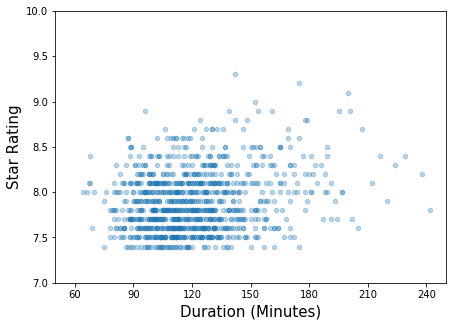

In [599]:
# Answer:
ax = movies_cleaned.plot.scatter(y='star_rating',x='duration',alpha=0.3,figsize=(7,5));
ax.set_xlabel('Duration (Minutes)',fontsize=15)
ax.set_ylabel('Star Rating',fontsize=15)
ax.set_ylim(ymin=7,ymax=10)
ax.set_xlim(xmin=50,xmax=250)
ax.set_xticks(range(60,250,30))

correlation = movies_cleaned['duration'].corr(movies_cleaned['star_rating']).round(3);
print('correlation coefficient:',correlation)

#### Calculate the average duration for each genre.

In [560]:
# Answer:
movies_cleaned.groupby('genre')['duration'].mean().round(1)

genre
Action       126.5
Adventure    134.8
Animation     96.6
Biography    131.8
Comedy       107.6
Crime        122.3
Drama        126.5
Family       107.5
Fantasy      112.0
Film-Noir     97.3
History       66.0
Horror       102.5
Mystery      115.6
Sci-Fi       109.0
Thriller     114.2
Western      136.7
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

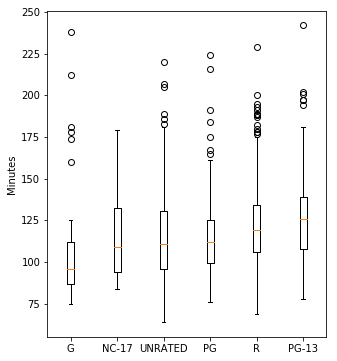

In [538]:
# Answer:
rating_sorted_by_duration = movies_cleaned.groupby('content_rating').median().sort_values('duration').index

fig, ax = plt.subplots(figsize=(5,6))
for index, column in enumerate(rating_sorted_by_duration):
    has_rating = (movies_cleaned.loc[:,'content_rating'] == column)
    ax.boxplot(movies_cleaned.loc[has_rating,'duration'], positions=[index])

ax.set_xticks(range(index+1))
ax.set_xticklabels(rating_sorted_by_duration)
ax.set_xlim(xmin=-0.5)
ax.set_ylabel("Minutes")
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [409]:
# Answer:
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [541]:
# Answer:
title_counts = movies_cleaned.loc[:,'title'].value_counts()
duplicate_title_bool = (title_counts > 1)
duplicate_titles = title_counts.loc[duplicate_title_bool]

duplicate_title_bool2 = movies_cleaned.loc[:,'title'].isin(duplicate_titles.index)
movies_cleaned.loc[duplicate_title_bool2,:].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


None of the above are actually duplicates.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [555]:
# Answer:
genres=['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
genre_bool = movies_cleaned.loc[:,'genre'].isin(genres)
movies_cleaned2 = movies_cleaned.loc[genre_bool]
movies_cleaned2.groupby('genre').mean().round(2)['star_rating']

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [554]:
# Answer:
genre_counts = movies_cleaned.loc[:,'genre'].value_counts()
genres_to_include_list = genre_counts.loc[(genre_counts >=10)].index
genres_to_include_bool = movies_cleaned.loc[:,'genre'].isin(genres_to_include_list)
movies_cleaned.loc[genres_to_include_bool,:].groupby('genre')['star_rating'].mean().round(2)

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [553]:
# Answer:
genre_ratings = movies_cleaned.groupby('genre')['star_rating'].mean().round(2)
genre_counts = movies_cleaned.loc[:,'genre'].value_counts()
genres_to_include_list = genre_counts.loc[(genre_counts >=10)].index
genres_to_include_bool = genre_ratings.index.isin(genres_to_include_list)
genre_ratings.loc[genres_to_include_bool]

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [566]:
# Answer:
stats_by_genre = movies_cleaned.groupby('genre')['star_rating'].agg(['count','mean'])
stats_by_genre['mean'] = stats_by_genre['mean'].round(2)
genres_to_include_bool = stats_by_genre.loc[:,'count'] >= 10
stats_by_genre.loc[genres_to_include_bool,'mean'].rename('star_rating')

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

## Average Rating of Brad Pitt Movies vs. All Movies in Top 1000

In [600]:
has_brad_pitt_bool = movies_cleaned.loc[:,'actors_list'].str.contains('Brad Pitt')
brad_pitt_ratings = movies_cleaned.loc[has_brad_pitt_bool,'star_rating'].mean()
print("Average Brad Pitt Movie Rating:", round(brad_pitt_ratings,2))

top_1000_ratings = movies_cleaned.loc[:,'star_rating'].mean()
print("Average Top 1000 Movie Rating:", round(top_1000_ratings,2))

Average Brad Pitt Movie Rating: 7.92
Average Top 1000 Movie Rating: 7.89


## Actors with Highest Average Rating and At Least 5 Movies in the Top 1000

In [597]:
import re

char_list = ['\[', '\]','u\'','\'']

def remove_characters(input_string):
    return re.sub("|".join(char_list), "", input_string)

# Create combined actor list across all movies in DB
combined_actor_list=[]

actor_strings_series = movies_cleaned.loc[:,'actors_list'].apply(remove_characters)
actor_lists_series = actors.str.split(", ")
actor_lists_iter = iter(actor_lists_series)

for actor_list in actor_lists_iter:
    combined_actor_list.extend(actor_list)   
    
combined_actor_series = pd.Series(combined_actor_list)

# Determine which actors were in 5 or more movies in DB
actor_role_counts = combined_actor_series.value_counts()
five_or_more_roles_bool = (actor_role_counts >= 5)
actors_to_include = actor_role_counts.loc[five_or_more_roles_bool]
actors_to_include_list = list(actors_to_include.index)

# Determine actors with highest average star ratings
actor_ratings = pd.Series()

for actor in actors_to_include_list:
    has_actor_bool = actor_strings_series.str.contains(actor)
    actor_ratings[actor] = round(movies_cleaned.loc[has_actor_bool,'star_rating'].mean(),2)

actor_ratings.sort_values(ascending=False).head(20)

Charles Chaplin      8.48
Aamir Khan           8.40
Elijah Wood          8.30
Kevin Spacey         8.27
Paul Newman          8.20
Ian McKellen         8.20
James Stewart        8.19
William Holden       8.17
Harrison Ford        8.14
Humphrey Bogart      8.13
Al Pacino            8.11
Morgan Freeman       8.09
Matt Damon           8.07
Tim Robbins          8.06
Uma Thurman          8.06
Leonardo DiCaprio    8.05
Cary Grant           8.05
Robert De Niro       8.04
Christian Bale       8.03
Joe Pesci            8.02
dtype: float64

Charlie Chaplin has the highest average movie rating of any actor with 5 or more movies in the IMDB Top 1000.
As expected, the top 20 list includes the likes of Harrison Ford, Al Pacino, Morgan Freeman, Matt Damon, Leonardo DiCaprio, Robert De Niro, and Christian Bale.
Interestingly, Uma Thurman is the only woman in the top 20 list, having been featured in several hit Quentin Tarantino films.